In [1]:
import pandas as pd
from confidence import *

In [2]:
# Prepare dataset

data = pd.read_csv('~/Datasets/transfusion.data.txt', sep = ',', header=None)
data.head()

,0,1,2,3,4
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [5]:
y = data[4]
X = data.drop(4, axis = 1)
y = np.ravel(y)
len(y)

748

In [7]:
print np.unique(y, return_counts=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) 
rbtsc = RobustScaler()
X_train = rbtsc.fit_transform(X_train)   
X_test = rbtsc.transform(X_test) 

(array([0, 1]), array([570, 178]))


### All Results in One Graph

Accuracy at threshold 0.0 is 0.246666666667
Accuracy at threshold 0.01 is 0.253333333333
Accuracy at threshold 0.02 is 0.263333333333
Accuracy at threshold 0.03 is 0.27
Accuracy at threshold 0.04 is 0.273333333333
Accuracy at threshold 0.05 is 0.296666666667
Accuracy at threshold 0.06 is 0.31
Accuracy at threshold 0.07 is 0.35
Accuracy at threshold 0.08 is 0.38
Accuracy at threshold 0.09 is 0.386666666667
Accuracy at threshold 0.1 is 0.396666666667
Accuracy at threshold 0.11 is 0.413333333333
Accuracy at threshold 0.12 is 0.43
Accuracy at threshold 0.13 is 0.47
Accuracy at threshold 0.14 is 0.473333333333
Accuracy at threshold 0.15 is 0.496666666667
Accuracy at threshold 0.16 is 0.53
Accuracy at threshold 0.17 is 0.546666666667
Accuracy at threshold 0.18 is 0.56
Accuracy at threshold 0.19 is 0.58
Accuracy at threshold 0.2 is 0.593333333333
Accuracy at threshold 0.21 is 0.616666666667
Accuracy at threshold 0.22 is 0.616666666667
Accuracy at threshold 0.23 is 0.64
Accuracy at threshold 0

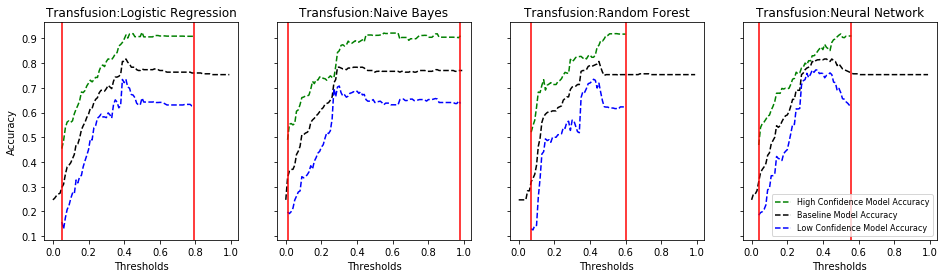

In [8]:
model = perform_logistic_regression(X_train, y_train)
full_threshold, conf_threshold, accuracy_model, accuracy_high_conf, accuracy_low_conf = get_all_accuracy_set_with_thresholds(model, X_train, y_train, X_test, y_test)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(16,4))


ax1.plot(conf_threshold,accuracy_high_conf, 'g--', label = "High Confidence Model Accuracy")
ax1.plot(full_threshold,accuracy_model, 'k--', label = "Baseline Model Accuracy")
ax1.plot(conf_threshold,accuracy_low_conf, 'b--', label = "Low Confidence Model Accuracy")
ax1.axvline(conf_threshold[0], color='r')
ax1.axvline(conf_threshold[-1], color='r')
ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Accuracy')
ax1.set_title('Transfusion:Logistic Regression')


model = perform_gaussian_nb(X_train, y_train)
full_threshold, conf_threshold, accuracy_model, accuracy_high_conf, accuracy_low_conf = get_all_accuracy_set_with_thresholds(model, X_train, y_train, X_test, y_test)
ax2.plot(conf_threshold,accuracy_high_conf, 'g--', label = "High Confidence Model Accuracy")
ax2.plot(full_threshold,accuracy_model, 'k--', label = "Baseline Model Accuracy")
ax2.plot(conf_threshold,accuracy_low_conf, 'b--', label = "Low Confidence Model Accuracy")
ax2.axvline(conf_threshold[0], color='r')
ax2.axvline(conf_threshold[-1], color='r')
ax2.set_xlabel('Thresholds')
ax2.set_title('Transfusion:Naive Bayes')



model = perform_random_forest(X_train, y_train)
full_threshold, conf_threshold, accuracy_model, accuracy_high_conf, accuracy_low_conf = get_all_accuracy_set_with_thresholds(model, X_train, y_train, X_test, y_test)
ax3.plot(conf_threshold,accuracy_high_conf, 'g--', label = "High Confidence Model Accuracy")
ax3.plot(full_threshold,accuracy_model, 'k--', label = "Baseline Model Accuracy")
ax3.plot(conf_threshold,accuracy_low_conf, 'b--', label = "Low Confidence Model Accuracy")
ax3.axvline(conf_threshold[0], color='r')
ax3.axvline(conf_threshold[-1], color='r')
ax3.set_xlabel('Thresholds')
ax3.set_title('Transfusion:Random Forest')



model = perform_neural_network(X_train, y_train)
full_threshold, conf_threshold, accuracy_model, accuracy_high_conf, accuracy_low_conf = get_all_accuracy_set_with_thresholds(model, X_train, y_train, X_test, y_test)
ax4.plot(conf_threshold,accuracy_high_conf, 'g--', label = "High Confidence Model Accuracy")
ax4.plot(full_threshold,accuracy_model, 'k--', label = "Baseline Model Accuracy")
ax4.plot(conf_threshold,accuracy_low_conf, 'b--', label = "Low Confidence Model Accuracy")
ax4.axvline(conf_threshold[0], color='r')
ax4.axvline(conf_threshold[-1], color='r')
ax4.set_xlabel('Thresholds')
ax4.set_title('Transfusion:Neural Network')

ax4.legend(loc='best', prop={'size': 8})
plt.show()   
